This problem has flummoxed many people over the years, mathematicians included. Let's see if we can work it out by simulation.

The setting is derived from a television game show called "Let's Make a Deal". Monty Hall hosted this show in the 1960's, and it has since led to a number of spin-offs. An exciting part of the show was that while the contestants had the chance to win great prizes, they might instead end up with "zonks" that were less desirable. This is the basis for what is now known as the Monty Hall problem.

The setting is a game show in which the contestant is faced with three closed doors. Behind one of the doors is a fancy car, and behind each of the other two there is a goat. The contestant doesn't know where the car is, and has to attempt to find it under the following rules.

The contestant makes an initial choice, but that door isn't opened.
At least one of the other two doors must have a goat behind it. Monty opens one of these doors to reveal a goat, displayed in all its glory in Wikipedia:
There are two doors left, one of which was the contestant's original choice. One of the doors has the car behind it, and the other one has a goat. The contestant now gets to choose which of the two doors to open.
The contestant has a decision to make. Which door should she choose to open, if she wants the car? Should she stick with her initial choice, or switch to the other door? That is the Monty Hall problem.



the Solution 
In any problem involving chances, the assumptions about randomness are important. It's reasonable to assume that there is a 1/3 chance that the contestant's initial choice is the door that has the car behind it.

The solution to the problem is quite straightforward under this assumption, though the straightforward solution doesn't convince everyone. Here it is anyway.

The chance that the car is behind the originally chosen door is 1/3.
The car is behind either the originally chosen door or the door that remains. It can't be anywhere else.
Therefore, the chance that the car is behind the door that remains is 2/3.
Therefore, the contestant should switch.
That's it. End of story.

Step 1: What to Simulate 
For each play we will simulate what's behind all three doors:

the one the contestant first picks
the one that Monty opens
the remaining door
So we will be keeping track of three quantitites, not just one.



Step 2: Simulating One Play 
The bulk of our work consists of simulating one play of the game. This involves several pieces.

The Goats 
We start by setting up an array goats that contains unimaginative names for the two goats.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
goats = np.array(('first goat', 'second goat'))

To help Monty conduct the game, we are going to have to identify which goat is selected and which one is revealed behind the open door. The function other_goat takes one goat and returns the other.

In [4]:
def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'

In [5]:
other_goat('first goat'), other_goat('second goat'), other_goat('watermelon')

('second goat', 'first goat', None)

The Options 
The array hidden_behind_doors contains the set of things that could be behind the doors.

In [6]:
hidden_behind_doors = np.array(('car', 'first goat', 'second goat'))

We are now ready to simulate one play. To do this, we will define a function monty_hall_game that takes no arguments. When the function is called, it plays Monty's game once and returns a list consisting of:

the contestant's guess
what Monty reveals when he opens a door
what remains behind the other door
The game starts with the contestant choosing one door at random. In doing so, the contestant makes a random choice from among the car, the first goat, and the second goat.

If the contestant happens to pick one of the goats, then the other goat is revealed and the car is behind the remaining door.

If the contestant happens to pick the car, then Monty reveals one of the goats and the other goat is behind the remaining door.

In [7]:
def monty_hall_game():
    """Return 
    [contestant's guess, what Monty reveals, what remains behind the other door]"""
    
    contestant_guess = np.random.choice(hidden_behind_doors)
    
    if contestant_guess == 'first goat':
        return [contestant_guess, 'second goat', 'car']
    
    if contestant_guess == 'second goat':
        return [contestant_guess, 'first goat', 'car']
    
    if contestant_guess == 'car':
        revealed = np.random.choice(goats)
        return [contestant_guess, revealed, other_goat(revealed)]

In [8]:
monty_hall_game()

['first goat', 'second goat', 'car']

Step 3: Number of Repetitions
To gauge the frequency with which the different results occur, we have to play the game many times and collect the results. Let's run 10,000 repetitions.

Step 4: Coding the Simulation
It's time to run the whole simulation.

We will play the game 10,000 times and collect the results in a table. Each row of the table will contain the result of one play.

One way to grow a table by adding a new row is to use the append method. If my_table is a table and new_row is a list containing the entries in a new row, then my_table.append(new_row) adds the new row to the bottom of my_table.

Note that append does not create a new table. It changes my_table to have one more row than it did before.

First let's create a table games that has three empty columns. We can do this by just specifying a list of the column labels, as follows.

In [12]:
games = pd.DataFrame({
    'Guess': [], 
    'Revealed': [], 
    'Remaining': []
})
games 

,Guess,Revealed,Remaining


Now we can add 10,000 rows to trials. Each row will represent the result of one play of Monty's game.

In [14]:
for i in np.arange(10000):
    games.loc[i] = monty_hall_game()

In [ ]:
Visualization
To see whether the contestant should stick with her original choice or switch, let's see how frequently the car is behind each of her two options.

To see whether the contestant should stick with her original choice or switch, let's see how frequently the car is behind each of her two options.

In [16]:
original_choice = games['Guess'].value_counts().reset_index().rename(
 columns = {
 'index' : 'Guess',
 'Guess' : 'Count',
 })
original_choice

,Guess,Count
0,second goat,3413
1,first goat,3317
2,car,3270


In [17]:
remaining_door = games['Remaining'].value_counts().reset_index().rename(
 columns = {
 'index' : 'Remaining',
 'Remaining' : 'Count',
 })
remaining_door

,Remaining,Count
0,car,6730
1,second goat,1661
2,first goat,1609


As our earlier solution said, the car is behind the remaining door two-thirds of the time, to a pretty good approximation. The contestant is twice as likely to get the car if she switches than if she sticks with her original choice.

In [18]:
combined = pd.concat([
 original_choice.rename(
 columns = {
 'Guess': 'Item',
 'Count' : 'Original Door'
 }),
 remaining_door[['Count']].rename(
 columns = {
 'Count' : 'Remaining Door'
 })
], axis = 1)

combined

,Item,Original Door,Remaining Door
0,second goat,3413,6730
1,first goat,3317,1661
2,car,3270,1609


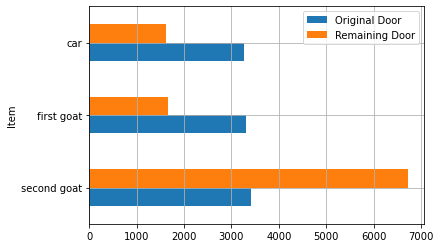

In [19]:
combined.plot(x="Item", y=['Original Door', 'Remaining Door'], kind="barh")
plt.grid(True)
plt.show()